# Clustering de Imagens - Kmeans

In [17]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josaf\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
#importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
# Carregamento e Pré-processamento
# Carregando o dataset MNIST
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [20]:
#Normalizando os dados para o intervalo [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
# Transformar as imagens em vetores

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [22]:
print(f"Formato dos dados de treino: {X_train_flat.shape}")

Formato dos dados de treino: (60000, 784)


In [23]:
# Aplicação do PCA para Redução de Dimensionalidade
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_train_flat)

print(f"Formato dos dados após PCA: {X_pca.shape}")

Formato dos dados após PCA: (60000, 50)


In [24]:
# Número de cluster
wcss = []
range_k = range(1,11)

for k in range_k:
  kmeans  = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_pca)
  wcss.append(kmeans.inertia_)

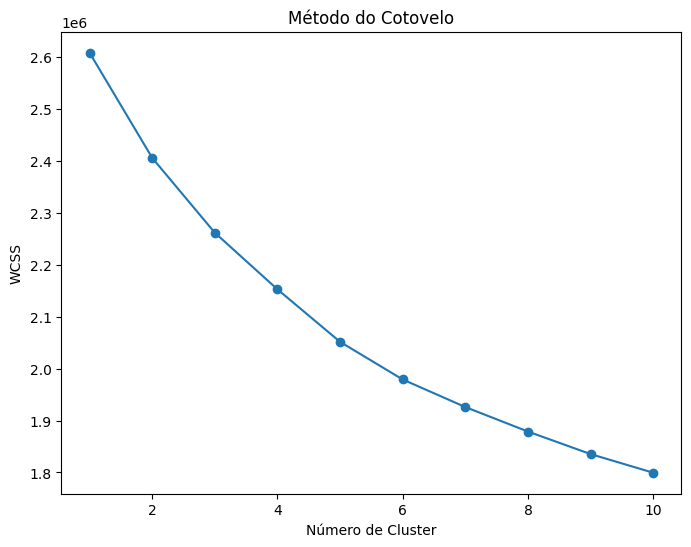

In [25]:
# Plot do método do cotovelo
plt.figure(figsize=(8,6))
plt.plot(range_k, wcss, marker='o', linestyle='-')
plt.xlabel('Número de Cluster')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

In [30]:
# Número Ótimo de Cluster
num_cluster = 10

kmeans = KMeans(n_clusters=num_cluster, random_state=42,n_init=10)
y_clusters = kmeans.fit_predict(X_pca)
print(f"Cluster atribuídos: {np.unique(y_clusters)}")

Cluster atribuídos: [0 1 2 3 4 5 6 7 8 9]


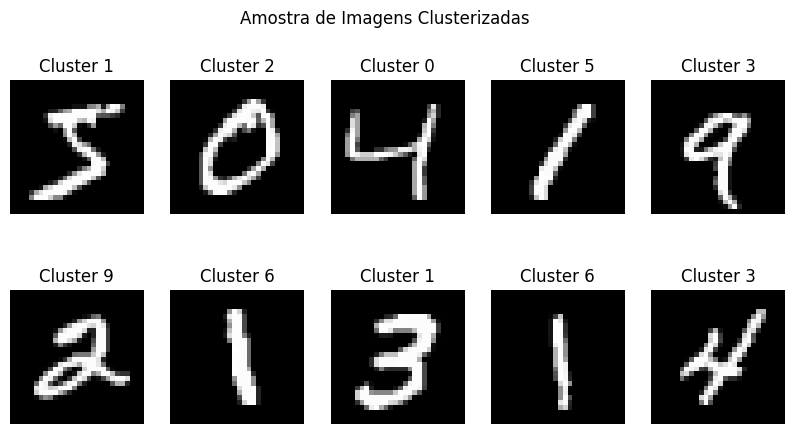

In [33]:
# Visualização dos Cluster
def plot_images(images, labels, title):
  fig, axes = plt.subplots(2,5,figsize=(10,5))
  fig.suptitle(title)

  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='gray')
    ax.set_title(f"Cluster {labels[i]}")
    ax.axis('off')

  plt.show()

# Exibir algumas imagens agrupadas
sample_images = X_train[:10]
sample_labels = y_clusters[:10]

plot_images(sample_images, sample_labels, "Amostra de Imagens Clusterizadas")